In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [2]:
df = pd.read_csv('data.csv')

FileNotFoundError: File b'data.csv' does not exist

In [ ]:
# Explore the data set
print(df.head(2))

In [ ]:
print(df.info())

In [41]:
y = df.diagnosis
X = df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)
#print(x.head(2))

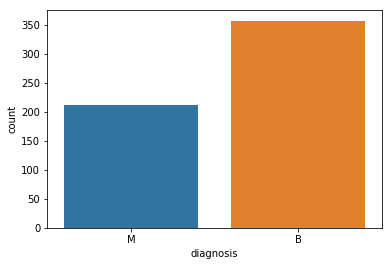

In [42]:
sns.countplot(y)

In [43]:
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [44]:
X_st = (X - X.mean()) / X.std()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

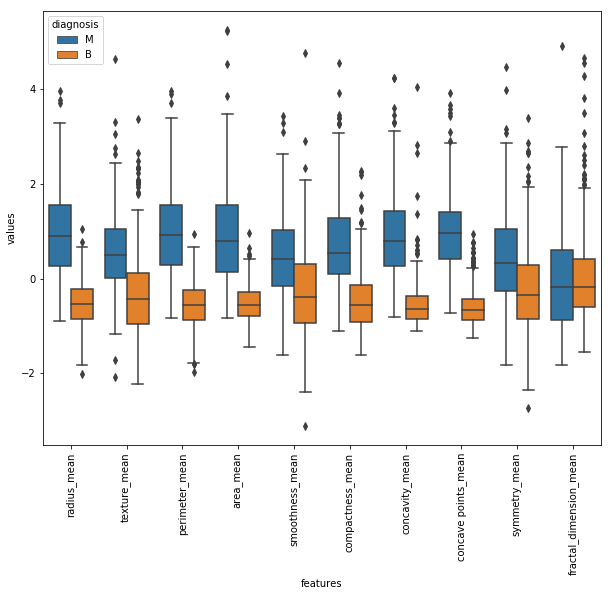

In [45]:
# Group the features into three parts, for each parts, using boxplot to see the distribution
data = pd.concat([y,X_st.iloc[:,0:10]],axis=1)
data = pd.melt(data, id_vars='diagnosis', var_name='features', value_name='values')
plt.figure(figsize=(10,8))
sns.boxplot(x='features', y='values', hue='diagnosis', data=data)
plt.xticks(rotation=90)
print(data.head(5))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

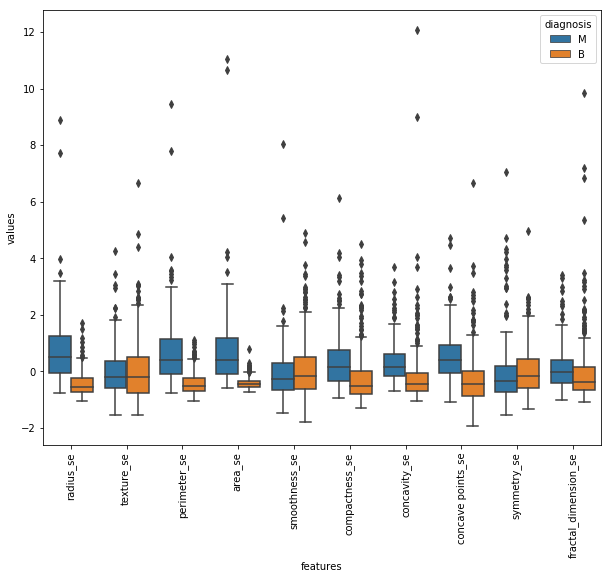

In [47]:
data = pd.concat([y,X_st.iloc[:,10:20]],axis=1)
data = pd.melt(data, id_vars='diagnosis', var_name='features', value_name='values')
plt.figure(figsize=(10,8))
sns.boxplot(x='features', y='values', hue='diagnosis', data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

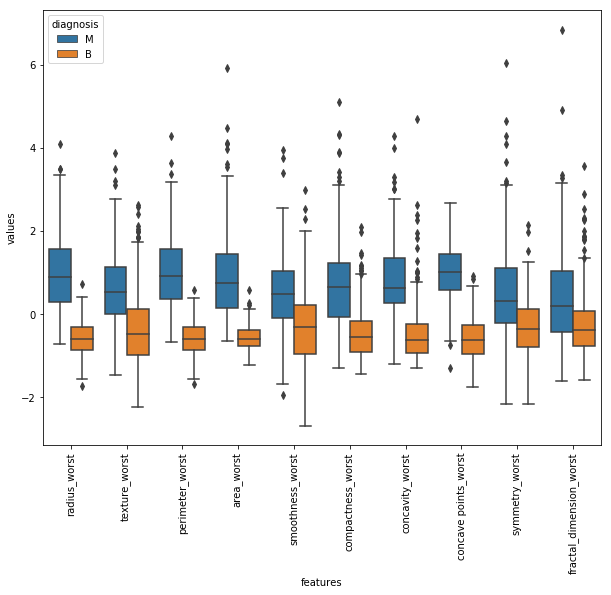

In [48]:
data = pd.concat([y,X_st.iloc[:,20:30]],axis=1)
data = pd.melt(data, id_vars='diagnosis', var_name='features', value_name='values')
plt.figure(figsize=(10,8))
sns.boxplot(x='features', y='values', hue='diagnosis', data=data)
plt.xticks(rotation=90)

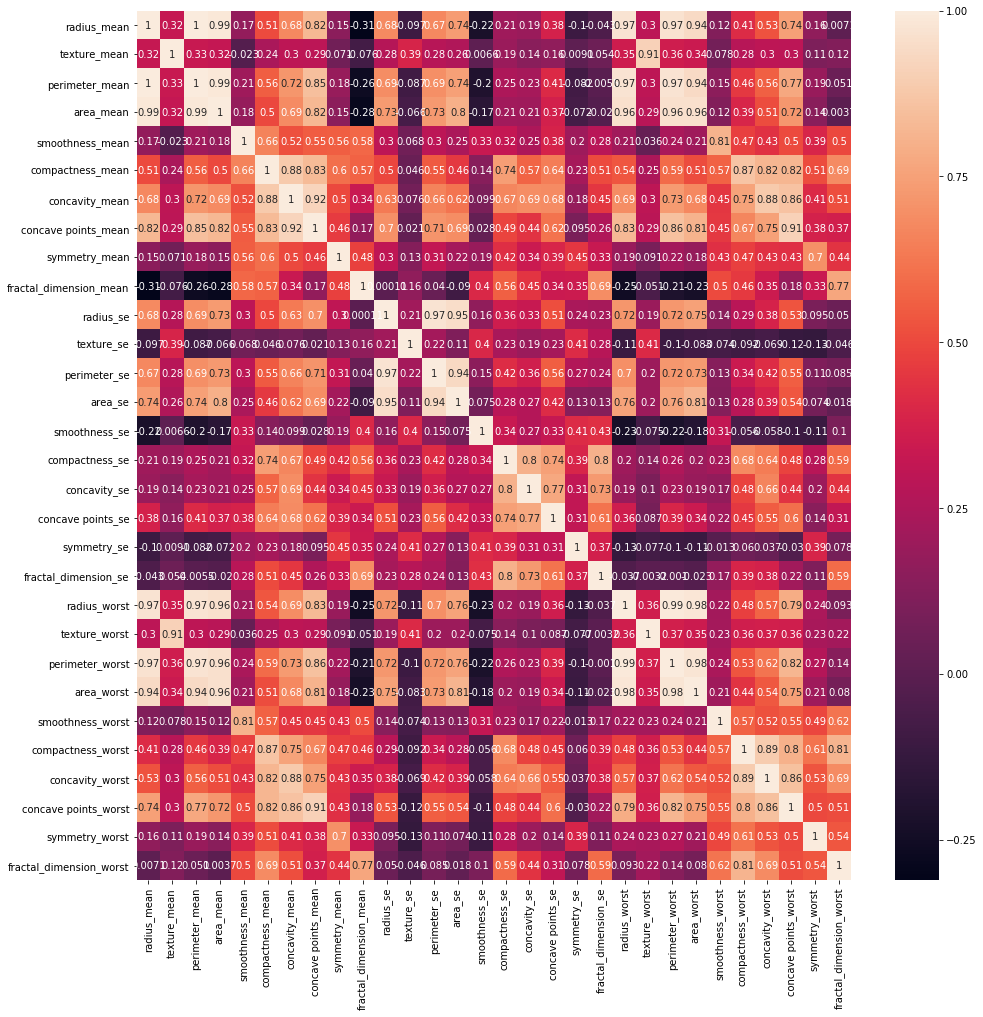

In [49]:
# find the correlation between features
plt.figure(figsize=(16,16))
sns.heatmap(X.corr(), annot=True)

In [52]:
# split the training set and the test set
X_train, X_test, y_train, y_test = train_test_split(X_st, y, test_size = 0.2, random_state=42)

In [53]:
# applying PCA
pca = PCA()
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

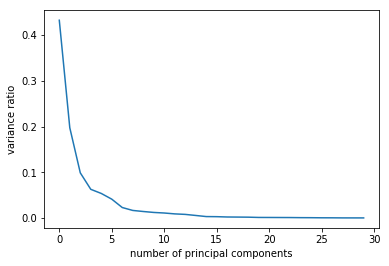

In [57]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of principal components')
plt.ylabel('variance ratio')
plt.show()

In [61]:
pca2 = PCA(n_components=6)
pca2.fit(X_train)
X_train_pca = pca2.transform(X_train)
X_test_pca = pca2.transform(X_test)

In [63]:
X_train_pca.shape

(455, 6)

In [103]:
# Applying KNN
neighbors = np.arange(1, 30)
param_grid = {'n_neighbors':neighbors}
knn_cv = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
knn_cv.fit(X_train_pca, y_train)
print(knn_cv.best_params_)
print(svmc_cv.best_score_)

{'n_neighbors': 1}
0.9692307692307692


In [106]:
knn = KNeighborsClassifier(n_neighbors=knn_cv.best_params_['n_neighbors'])
knn.fit(X_train_pca, y_train)
y_pred = knn.predict(X_test_pca)
c = confusion_matrix(y_test, y_pred)
print(c)
print(classification_report(y_test, y_pred))

[[67  4]
 [ 2 41]]
             precision    recall  f1-score   support

          B       0.97      0.94      0.96        71
          M       0.91      0.95      0.93        43

avg / total       0.95      0.95      0.95       114



In [101]:
# Applying logistic regression
c_space = np.logspace(-5, 8, 20)
param_grid = {'C': c_space}
logreg_cv = GridSearchCV(LogisticRegression(), param_grid, cv=5)
logreg_cv.fit(X_train_pca, y_train)
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.12742749857031346}
Best score is 0.9714285714285714


In [102]:
logreg = LogisticRegression(C=logreg_cv.best_params_['C'])
logreg.fit(X_train_pca, y_train)
y_pred = logreg.predict(X_test_pca)
c = confusion_matrix(y_test, y_pred)
print(c)
print(classification_report(y_test, y_pred))

[[70  1]
 [ 1 42]]
             precision    recall  f1-score   support

          B       0.99      0.99      0.99        71
          M       0.98      0.98      0.98        43

avg / total       0.98      0.98      0.98       114



In [99]:
# Applying SVM
c_space = np.logspace(-1, 10, 1)
kernel_space = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = {'C': c_space, 'kernel': kernel_space}
svmc_cv = GridSearchCV(SVC(), param_grid, cv=5)
svmc_cv.fit(X_train_pca, y_train)
print(svmc_cv.best_params_)
print(svmc_cv.best_score_)

{'C': 0.1, 'kernel': 'linear'}
0.9692307692307692


In [100]:
svmc = SVC(C=svmc_cv.best_params_['C'], kernel=svmc_cv.best_params_['kernel'])
svmc.fit(X_train_pca, y_train)
y_pred = svmc.predict(X_test_pca)
c = confusion_matrix(y_test, y_pred)
print(c)
print(classification_report(y_test, y_pred))

[[70  1]
 [ 2 41]]
             precision    recall  f1-score   support

          B       0.97      0.99      0.98        71
          M       0.98      0.95      0.96        43

avg / total       0.97      0.97      0.97       114

